In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('data/clean_df.csv')

In [3]:
df.head(3)

,Unnamed: 0,title,subreddit,subscribers,created,over_18,spoiler,is_video,abv_median
0,0,2022 r/Formula1 Predictions Tournament,formula1,2421676,2022-09-01 10:21:50,0,0,0,1
1,1,Ex-NYPD officer gets 10 years in prison for Ja...,news,25142728,2022-09-01 20:35:22,0,0,0,1
2,2,TIL prostitution is illegal in Japan but the l...,todayilearned,28610643,2022-09-01 21:39:29,0,0,0,1


In [4]:
df.shape

(12541, 9)

In [5]:
df.head(3)

,Unnamed: 0,title,subreddit,subscribers,created,over_18,spoiler,is_video,abv_median
0,0,2022 r/Formula1 Predictions Tournament,formula1,2421676,2022-09-01 10:21:50,0,0,0,1
1,1,Ex-NYPD officer gets 10 years in prison for Ja...,news,25142728,2022-09-01 20:35:22,0,0,0,1
2,2,TIL prostitution is illegal in Japan but the l...,todayilearned,28610643,2022-09-01 21:39:29,0,0,0,1


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
# sorted(df.created.unique())

In [61]:
df.dtypes

title          object
subreddit      object
subscribers     int64
created        object
over_18         int64
spoiler         int64
is_video        int64
abv_median      int64
dtype: object

### Train/Test Split

In [8]:
X = df.iloc[:, 0:8]
y = df['abv_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [9]:
X_train.shape, y_train.shape

((9405, 8), (9405,))

### Baseline

In [10]:
y.value_counts(normalize=False)

1    6319
0    6222
Name: abv_median, dtype: int64

In [11]:
y.value_counts(normalize=True)

1    0.503867
0    0.496133
Name: abv_median, dtype: float64

### Vectorizing Title

In [12]:
cv = CountVectorizer(stop_words = 'english')

In [13]:
cv.fit(X_train['title'])

X_train_cv = cv.transform(X_train['title'])
X_test_cv = cv.transform(X_test['title'])

In [14]:
X_train_cv

<9405x15583 sparse matrix of type '<class 'numpy.int64'>'
	with 52008 stored elements in Compressed Sparse Row format>

In [15]:
pd.DataFrame(X_train_cv.A, columns = cv.get_feature_names())

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000lbs,000m,003,005,01,010,02,020,...,责任重大,赤诚奉献,这次大会选举我继续担任中华捞逼共和国主席,鐮刀用力割,韭菜讚鐮刀,香川照之性骚扰殴打陪酒女,𝕄𝕚𝕤𝕤𝕪,𝕚𝕥,𝕜𝕚𝕝𝕝𝕖𝕕,𝙬𝙝𝙖𝙩
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
cv.get_feature_names_out()

array(['00', '000', '000lbs', ..., '𝕚𝕥', '𝕜𝕚𝕝𝕝𝕖𝕕', '𝙬𝙝𝙖𝙩'], dtype=object)

In [17]:
len(cv.get_feature_names_out())

15583

In [42]:
text_df = pd.DataFrame(X_train_cv.A, columns=cv.get_feature_names_out())
text_df.head(3)

,00,000,000lbs,000m,003,005,01,010,02,020,...,责任重大,赤诚奉献,这次大会选举我继续担任中华捞逼共和国主席,鐮刀用力割,韭菜讚鐮刀,香川照之性骚扰殴打陪酒女,𝕄𝕚𝕤𝕤𝕪,𝕚𝕥,𝕜𝕚𝕝𝕝𝕖𝕕,𝙬𝙝𝙖𝙩
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
text_df_test = pd.DataFrame(X_test_cv.A, columns=cv.get_feature_names_out())
text_df_test.head(3)

,00,000,000lbs,000m,003,005,01,010,02,020,...,责任重大,赤诚奉献,这次大会选举我继续担任中华捞逼共和国主席,鐮刀用力割,韭菜讚鐮刀,香川照之性骚扰殴打陪酒女,𝕄𝕚𝕤𝕤𝕪,𝕚𝕥,𝕜𝕚𝕝𝕝𝕖𝕕,𝙬𝙝𝙖𝙩
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Evaluation

In [19]:
y_train.shape, text_df.shape

((9405,), (9405, 15583))

In [58]:
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()

In [56]:
rfc_scores = cross_val_score(rfc, text_df, y_train, cv=3, n_jobs=-1)
print(rfc_scores)
print(rfc_scores.mean())

[0.54896332 0.5754386  0.54736842]
0.5572567783094099


In [60]:
etc_scores = cross_val_score(etc, text_df, y_train, cv=3, n_jobs=-1)
print(etc_scores)
print(etc_scores.mean())

[0.55406699 0.57639553 0.53939394]
0.5566188197767145


In [22]:
logreg = LogisticRegression()

logreg.fit(X_train_cv, y_train)

LogisticRegression()

In [32]:
print(logreg.coef_, logreg.intercept_)

[[-0.00798864  0.6226993   0.11676149 ... -0.22865802 -0.22865802
  -0.49372316]] [-0.30046219]


In [24]:
# coef1 = logreg.coef_

In [25]:
# np.sort(coef1.sum())

In [26]:
# coef1.sum().sort_values(ascending=False).head(10)

In [27]:
# text_df.sum().sort_values(ascending=False).head(10)

In [28]:
# text_df.sum().sort_values(ascending=False).tail(100)

In [29]:
# overfitting 

logreg.score(X_train_cv, y_train), logreg.score(X_test_cv, y_test)

(0.9046251993620414, 0.5768494897959183)

In [45]:
y_preds = logreg.predict(text_df_test)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [46]:
confusion_matrix(y_test, y_preds)

array([[986, 570],
       [757, 823]], dtype=int64)

In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [48]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 986

False Positives: 570

False Negatives: 757

True Positives: 823


In [55]:
preds = logreg.predict(text_df_test)

print(classification_report(y_test, preds, target_names=['Above Mean', 'Below Mean']))

C:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

  Above Mean       0.57      0.63      0.60      1556
  Below Mean       0.59      0.52      0.55      1580

    accuracy                           0.58      3136
   macro avg       0.58      0.58      0.58      3136
weighted avg       0.58      0.58      0.58      3136



### Visuals

C:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


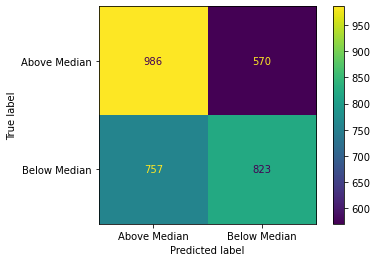

In [53]:
ConfusionMatrixDisplay.from_estimator(logreg, text_df_test, y_test, display_labels = ['Above Median', 'Below Median']);